In [223]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np

In [193]:
df = np.genfromtxt('input.txt', delimiter=1, dtype=int)

# Part1

In [194]:
height, width = np.shape(df)
total_vis = 0
mask = np.zeros((height, width))


def top_down(col):
    m = df[0, col]
    mask[0, col] = 1
    vis = 1
    
    for i in range(1, height):
        if df[i, col] <= m:
            continue
        
        if df[i, col] == 9:
            mask[i, col] = 1 
            return vis+1
    
        m = df[i, col]
        vis += 1
        mask[i, col] = 1
        
    return vis

def bottom_up(col):
    m = df[height-1, col]
    mask[height-1, col] = 1
    vis = 1
    
    for i in range(height-1, -1, -1):
        if df[i, col] <= m:
            continue
        
        if df[i, col] == 9:
            mask[i, col] = 1 
            return vis+1
    
        m = df[i, col]
        vis += 1
        mask[i, col] = 1
        
    return vis


def left_right(row):
    m = df[row, 0]
    mask[row, 0] = 1
    vis = 1
    
    for i in range(0, width):
        if df[row, i] <= m:
            continue
        
        if df[row, i] == 9:
            mask[row, i] = 1 
            return vis+1
    
        m = df[row, i]
        vis += 1
        mask[row, i] = 1
        
    return vis

def right_left(row):
    m = df[row, width-1]
    mask[row, width-1] = 1
    vis = 1
    
    for i in range(width-1, -1, -1):
        if df[row, i] <= m:
            continue
        
        if df[row, i] == 9:
            mask[row, i] = 1 
            return vis+1
    
        m = df[row, i]
        vis += 1
        mask[row, i] = 1
        
    return vis

for c in range(width):
    top_down(c)
    bottom_up(c)
    left_right(c)
    right_left(c)

print(np.count_nonzero(mask))

1533


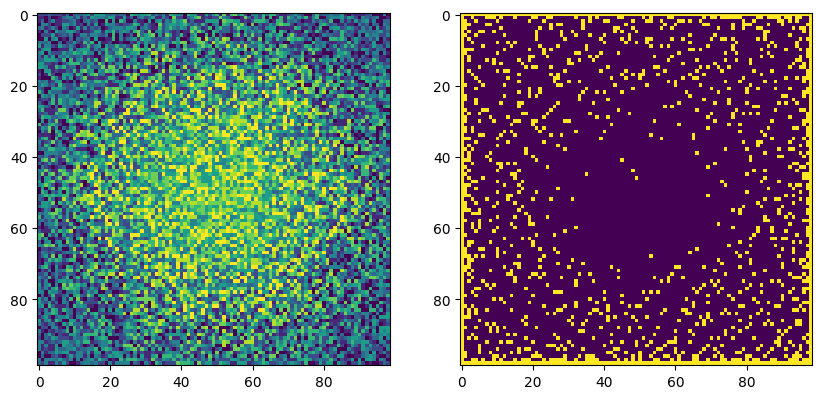

In [195]:
fig, [ax1, ax2] = plt.subplots(figsize=(10, 10), nrows=1, ncols=2)

ax1.imshow(df,  vmin=0, vmax=9, interpolation='none')
ax2.imshow(mask, vmin=0, vmax=1, interpolation='none')

plt.show()

# Part2

In [205]:
def scenig_score(x, y):
    v = df[x, y]
    m = np.zeros((height, width))
    m[x, y] = 2
    ct = 0
    cb = 0
    cl = 0
    cr = 0
    
    # to top
    t = x - 1 
    while (t >= 0):
        if df[t, y] < v:
            ct += 1
            m[t, y] = 1
        elif df[t, y] >= v:
            ct += 1
            m[t, y] = 1
            break
        t -= 1
    
    # to bottom
    t = x + 1
    while (t < height):
        if df[t, y] < v:
            cb += 1
            m[t, y] = 1
        elif df[t, y] >= v:
            cb += 1
            m[t, y] = 1
            break
        t += 1
            
    # to left
    t = y - 1 
    while (t >= 0):
        if df[x, t] < v:
            cl += 1
            m[x, t] = 1
        elif df[x, t] >= v:
            cl += 1
            m[x, t] = 1
            break
        t -= 1
    
    # to right
    t = y + 1
    while (t < width):
        if df[x, t] < v:
            cr += 1
            m[x, t] = 1
        elif df[x, t] >= v:
            cr += 1
            m[x, t] = 1
            break
        t += 1
    
    return (ct * cb * cl * cr, m)

In [197]:
max_score = 0
scene_mask = None
for x in range(width):
    for y in range(height): 
        score, m = scenig_score(x, y)
        if score > max_score:
            max_score = score
            scene_mask = m

In [202]:
max_score

345744

In [198]:
scene_mask[scene_mask == 0] = np.nan # or use np.nan

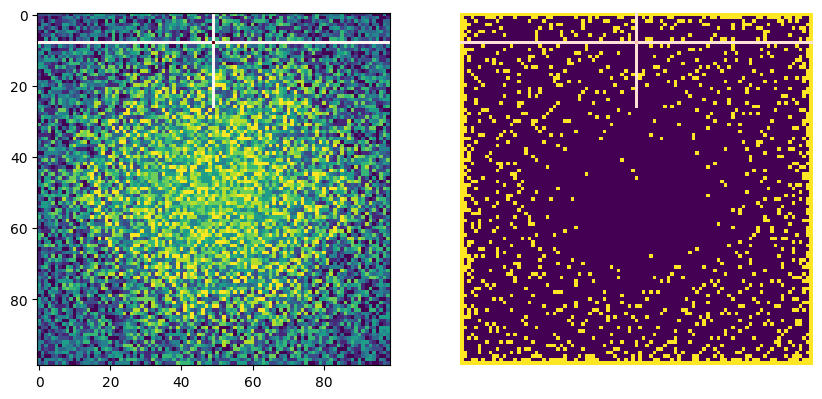

In [211]:
fig, [ax1, ax2] = plt.subplots(figsize=(10, 10), nrows=1, ncols=2)

ax1.imshow(df,  vmin=0, vmax=9, interpolation='none')
ax1.imshow(scene_mask,  vmin=1, vmax=2, interpolation='none', cmap='Reds', alpha=1)
ax2.imshow(mask, vmin=0, vmax=1, interpolation='none')
ax2.imshow(scene_mask,  vmin=0, vmax=9, interpolation='none', cmap='Reds', alpha=1)

plt.axis('off')
plt.show()

# Save image with scene range for each tree

In [222]:
max_score = 0
scene_mask = np.zeros((height, width))
scene_mask[scene_mask == 0] = np.nan

def save_plt(n, arr, best, current):
    fig, ax = plt.subplots(figsize=(10, 10), nrows=1, ncols=1)

    ax.imshow(arr,  vmin=0, vmax=9, interpolation='none')
    
    best[best == 0] = np.nan
    ax.imshow(best,  vmin=1, vmax=2, interpolation='none', cmap='Reds', alpha=1)
    
    current[current == 0] = np.nan
    ax.imshow(current,  vmin=1, vmax=2, interpolation='none', cmap='Blues', alpha=1)

    plt.axis('off')
    plt.savefig(f"img/{n}.png")
    plt.close()

n = 0
for x in range(width):
    for y in range(height): 
        score, m = scenig_score(x, y)
        if score > max_score:
            max_score = score
            scene_mask = m
        save_plt(n, df, scene_mask, m)
        n += 1